<a href="https://colab.research.google.com/github/FannyFushayi/Battery_RUL/blob/main/HNEI_VER_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pycaret



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.

In [1]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ignaciovinuales/battery-remaining-useful-life-rul")

In [50]:
files_in_directory = os.listdir(path)
print(files_in_directory)

['Battery_RUL.csv']


In [51]:
HNEI_df = pd.read_csv(path+ '/Battery_RUL.csv')
HNEI_df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [52]:
battery_id = 0

def add_id(Cycle_Index):
  global battery_id
  if Cycle_Index == 1:
    battery_id = battery_id +1
  return battery_id


HNEI_df['battery_id'] = HNEI_df['Cycle_Index'].apply(add_id)


In [53]:
HNEI_df.drop(['Cycle_Index'], axis = 1, inplace = True)

In [55]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
outlier_labels = iso.fit_predict(HNEI_df.select_dtypes(include=['float', 'int']))
HNEI_df['outlier'] = outlier_labels
HNEI_df[HNEI_df['outlier'] == -1]

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id,outlier
9,435251.49,263086.078000,4.267,3.086,269.984,443700.02,443700.02,1102,1,-1
14,423271.35,168773.265000,4.270,3.108,219923.996,430028.84,430028.84,1097,1,-1
63,206007.26,-64192.716000,4.271,3.166,72809.982,84474.65,84474.65,1048,1,-1
208,200892.99,99536.926500,4.269,3.279,68880.004,80526.56,80526.56,902,1,-1
305,198748.44,192077.023000,4.266,3.290,66689.981,78255.55,78255.55,805,1,-1
...,...,...,...,...,...,...,...,...,...,...
14215,197596.99,-60038.611667,4.266,3.271,66720.000,78122.08,78122.08,905,14,-1
14390,194936.45,363652.924000,4.258,3.301,62279.999,73561.28,73561.28,712,14,-1
14585,192653.85,173778.491000,4.243,3.337,57360.000,68635.59,68635.59,516,14,-1
14780,190808.23,168279.164000,4.227,3.350,54060.004,65275.36,65275.36,320,14,-1


In [58]:

outliers_df.describe()


,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id,outlier
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0
mean,274143.285894,82579.259422,4.248636,3.280695,76856.177470,153314.544967,170397.107616,599.662252,7.039735,-1.0
std,178439.160641,123044.675908,0.024066,0.080502,49139.859089,199414.088251,206498.685330,374.550698,3.998134,0.0
min,180084.160000,-397645.908000,4.198000,3.022000,269.984000,2726.190000,60878.970000,0.000000,1.000000,-1.0
25%,191181.240000,3804.997333,4.231500,3.249500,55214.992500,68218.530000,68498.610000,319.000000,4.000000,-1.0
50%,197940.480000,86956.059000,4.255000,3.301000,62039.996000,76451.270000,77160.000000,610.000000,7.000000,-1.0
75%,205930.320000,173718.828000,4.269000,3.341000,69614.993000,85094.990000,85372.750000,997.500000,10.000000,-1.0
max,958320.370000,406703.768000,4.363000,3.396000,245101.117000,880728.100000,880728.100000,1123.000000,14.000000,-1.0


In [59]:
HNEI_df.describe()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id,outlier
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172,7.486126,0.979952
std,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514,4.023541,0.199239
min,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000,1.000000,-1.000000
25%,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000,4.000000,1.000000
50%,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000,7.000000,1.000000
75%,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000,11.000000,1.000000
max,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000,14.000000,1.000000


Text(0.5, 1.0, 'RUL Boxplot')

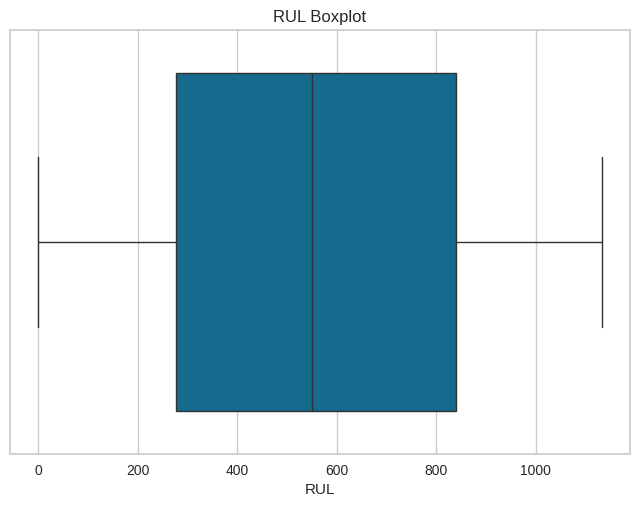

In [57]:
import seaborn as sns

sns.boxplot(x=HNEI_df['RUL'])
plt.title("RUL Boxplot")


In [60]:
HNEI_df_filtered = HNEI_df[HNEI_df['outlier'] != -1]

In [61]:
#I want to see if battery Id indeed leaks data
HNEI_df_test = HNEI_df_filtered[HNEI_df_filtered['battery_id'] == 1]
HNEI_train = HNEI_df_filtered[HNEI_df_filtered['battery_id'] != 1]

In [11]:
model = setup(data = HNEI_train, target = 'RUL', session_id = 123)

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(13988, 9)"
4,Transformed data shape,"(13988, 9)"
5,Transformed train set shape,"(9791, 9)"
6,Transformed test set shape,"(4197, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.2155,202.8682,13.8752,0.9980,0.1450,0.0756,2.6690
rf,Random Forest Regressor,6.3037,236.1987,15.0757,0.9977,0.1543,0.0938,5.6540
xgboost,Extreme Gradient Boosting,7.4235,291.6541,16.7542,0.9972,0.1622,0.0689,0.2630
lightgbm,Light Gradient Boosting Machine,10.0025,424.3098,20.1503,0.9959,0.1885,0.1073,1.0150
dt,Decision Tree Regressor,7.5609,513.2955,22.5385,0.9950,0.1797,0.0994,0.1670
gbr,Gradient Boosting Regressor,19.5477,880.9971,29.5942,0.9915,0.2760,0.1964,1.9330
knn,K Neighbors Regressor,26.1503,2170.7605,46.1914,0.9791,0.3125,0.2145,0.0640
ada,AdaBoost Regressor,57.5999,4918.9603,70.1002,0.9526,0.5034,0.6455,0.6870
lar,Least Angle Regression,95.7129,22584.6741,149.7363,0.7821,0.6291,0.8633,0.0240
ridge,Ridge Regression,96.6292,22587.0390,149.7992,0.7821,0.6345,0.8785,0.0230


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [13]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.2803,173.5833,13.1751,0.9983,0.1571,0.0874
1,5.2607,188.6258,13.7341,0.9982,0.2019,0.0799
2,5.6242,239.8402,15.4868,0.9977,0.2441,0.1906
3,4.8294,106.3529,10.3128,0.9990,0.1285,0.0340
4,4.6460,122.5451,11.0700,0.9989,0.1719,0.1167
5,4.8776,118.2487,10.8742,0.9989,0.0692,0.0235
6,5.0867,192.0885,13.8596,0.9981,0.1281,0.0257
7,5.4111,294.0392,17.1476,0.9971,0.1516,0.0938
8,6.0883,455.1014,21.3331,0.9957,0.1314,0.0816


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
predictions = predict_model(et, data = HNEI_df_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,26.9881,1343.7324,36.6570,0.9872,0.4437,0.5148


In [16]:
predictions.head()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),battery_id,RUL,prediction_label
0,2595.300049,1151.488525,3.670,3.211,5460.000977,6755.009766,10777.820312,1,1112,1105.94
1,7408.640137,1172.512451,4.246,3.220,5508.992188,6762.020020,10500.349609,1,1111,1104.40
2,7393.759766,1112.991943,4.249,3.224,5508.993164,6762.020020,10420.379883,1,1110,1103.80
3,7385.500000,1080.320679,4.250,3.225,5502.016113,6762.020020,10322.809570,1,1109,1103.68
4,65022.750000,29813.486328,4.290,3.398,5480.992188,53213.539062,56699.648438,1,1107,1092.81


In [42]:
#I feel like I could make a pipeline that takes data trains and tests

def pipeline(train_data, test_data):
  model = setup(data = train_data, target = 'RUL', session_id = 123)
  best_model = compare_models()
  predictions = predict_model(best_model, data = test_data)
  return best_model, predictions

In [62]:
HNEI_df_test.drop(['battery_id'], axis = 1, inplace = True)
HNEI_train.drop(['battery_id'], axis = 1, inplace = True)

best_model, predictions = pipeline(HNEI_train,HNEI_df_test)

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(13850, 9)"
4,Transformed data shape,"(13850, 9)"
5,Transformed train set shape,"(9695, 9)"
6,Transformed test set shape,"(4155, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.8735,387.4732,19.4128,0.9962,0.1807,0.1222,2.4410
rf,Random Forest Regressor,10.9707,607.3805,23.9753,0.9941,0.2038,0.1478,5.3360
xgboost,Extreme Gradient Boosting,14.0821,694.0843,25.8702,0.9933,0.2135,0.1432,0.2450
lightgbm,Light Gradient Boosting Machine,20.2032,1053.6858,32.1749,0.9898,0.2546,0.2140,1.4210
dt,Decision Tree Regressor,12.4065,1255.1642,35.0078,0.9879,0.2767,0.1477,0.1070
gbr,Gradient Boosting Regressor,30.9065,1800.1638,42.3712,0.9826,0.3387,0.3099,1.7540
knn,K Neighbors Regressor,25.9959,2057.5098,44.8889,0.9801,0.2912,0.2320,0.0420
ada,AdaBoost Regressor,51.3119,4072.4427,63.8040,0.9608,0.5059,0.7037,0.7640
lar,Least Angle Regression,51.2897,6656.4247,80.7855,0.9359,0.4892,0.5300,0.0340
ridge,Ridge Regression,51.0978,6652.0172,80.7468,0.9359,0.4918,0.5294,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,24.5278,1293.6482,35.9673,0.9876,0.3369,0.3113


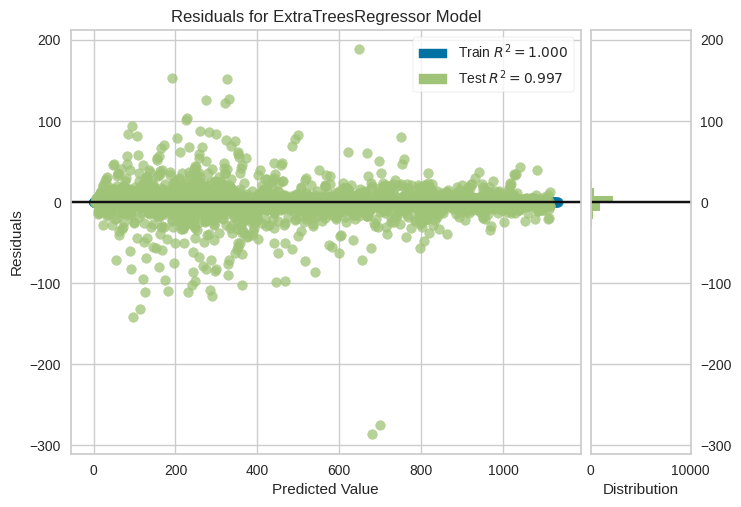

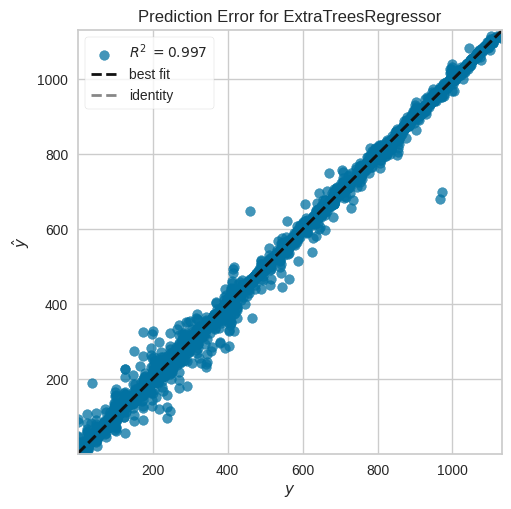

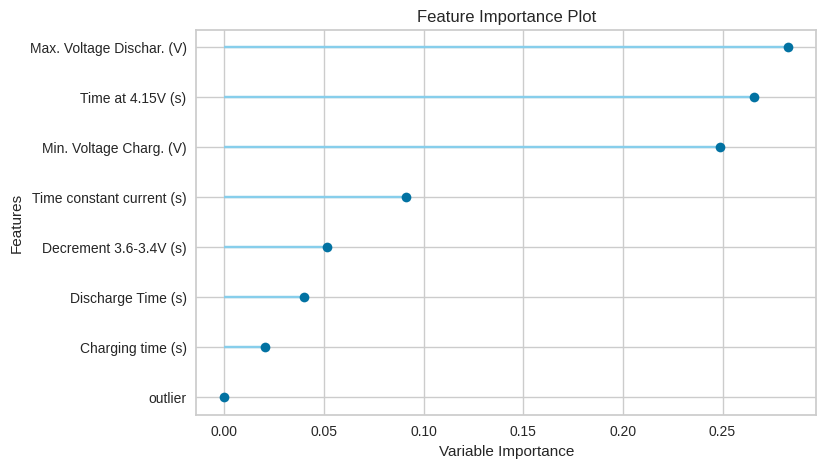

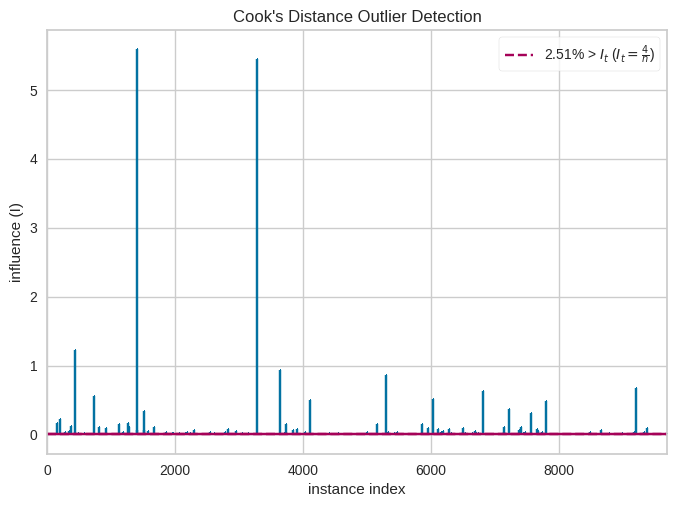

In [63]:
# Visualize residuals
plot_model(best_model, plot='residuals')

# Prediction error (predicted vs actual)
plot_model(best_model, plot='error')

# Feature importance
plot_model(best_model, plot='feature')

# Cumulative residual distribution
plot_model(best_model, plot='cooks')



In [22]:
HNEI_df_test.corr()['RUL'].sort_values(key = np.abs, ascending= False)

,RUL
Charging time (s),0.039749
Discharge Time (s),0.026390
Decrement 3.6-3.4V (s),0.018755


In [25]:
HNEI_df_test.columns

Index(['Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [34]:
HNEI_train.drop(['Charging time (s)', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)'], axis=1, inplace = True)
HNEI_df_test.drop(['Charging time (s)', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)'], axis = 1, inplace = True)

pipeline(HNEI_train,HNEI_df_test)

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(13988, 5)"
4,Transformed data shape,"(13988, 5)"
5,Transformed train set shape,"(9791, 5)"
6,Transformed test set shape,"(4197, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,14.1779,788.9420,28.0082,0.9924,0.2415,0.1765,1.6800
rf,Random Forest Regressor,16.2859,947.1884,30.6806,0.9909,0.2515,0.1883,3.0440
xgboost,Extreme Gradient Boosting,21.5378,1196.0030,34.5660,0.9885,0.2773,0.2139,0.2020
lightgbm,Light Gradient Boosting Machine,27.8512,1603.7837,40.0102,0.9846,0.3343,0.2844,0.7000
dt,Decision Tree Regressor,17.7282,1745.5467,41.6469,0.9832,0.3035,0.1885,0.0980
gbr,Gradient Boosting Regressor,35.8336,2319.4083,48.1275,0.9777,0.3721,0.3662,0.8380
knn,K Neighbors Regressor,38.9780,3518.9966,59.1043,0.9661,0.3969,0.3643,0.0780
ada,AdaBoost Regressor,64.4606,5824.0432,76.2896,0.9440,0.5249,0.7087,0.5010
lr,Linear Regression,107.5130,27268.3261,164.6847,0.7373,0.6785,0.9586,0.8240
ridge,Ridge Regression,108.3928,27294.0154,164.7925,0.7371,0.6825,0.9706,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.6171,1811.6328,42.5633,0.9827,0.3501,0.3348


,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),RUL,prediction_label
0,3.670,3.211,5460.000977,6755.009766,1112,1106.170
1,4.246,3.220,5508.992188,6762.020020,1111,1102.590
2,4.249,3.224,5508.993164,6762.020020,1110,1103.170
3,4.250,3.225,5502.016113,6762.020020,1109,1103.160
4,4.290,3.398,5480.992188,53213.539062,1107,1096.990
...,...,...,...,...,...,...
1071,3.810,3.709,1232.250000,1844.250000,4,47.905
1072,3.808,3.707,1232.250000,1844.250000,3,41.695
1073,3.807,3.708,1227.875000,1844.380005,2,44.185
1074,3.795,3.825,854.375000,1582.000000,1,89.210


In [66]:
HNEI_df_test.head()

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,outlier
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1


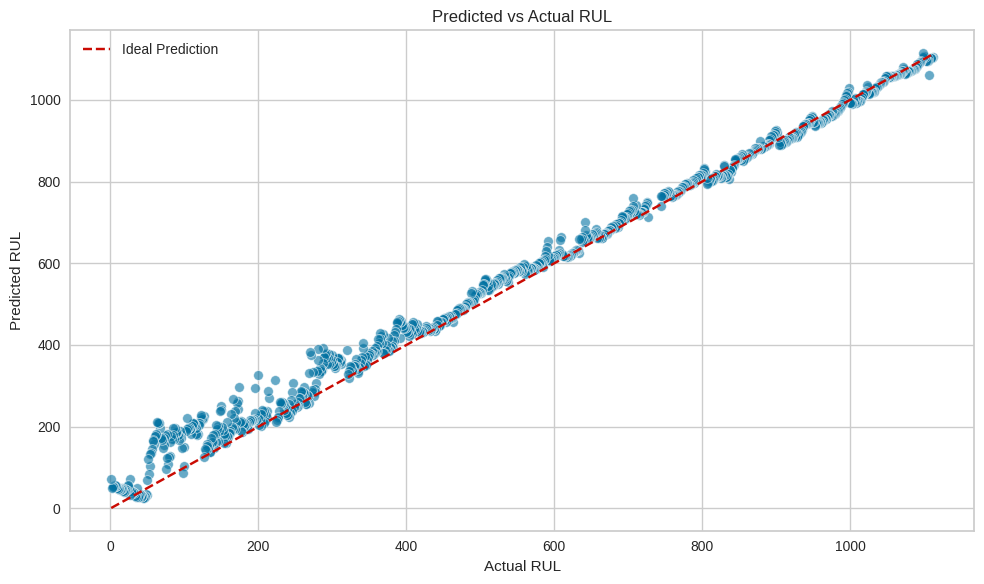

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted RUL values
y_test = predictions['RUL']
y_pred = predictions['prediction_label']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

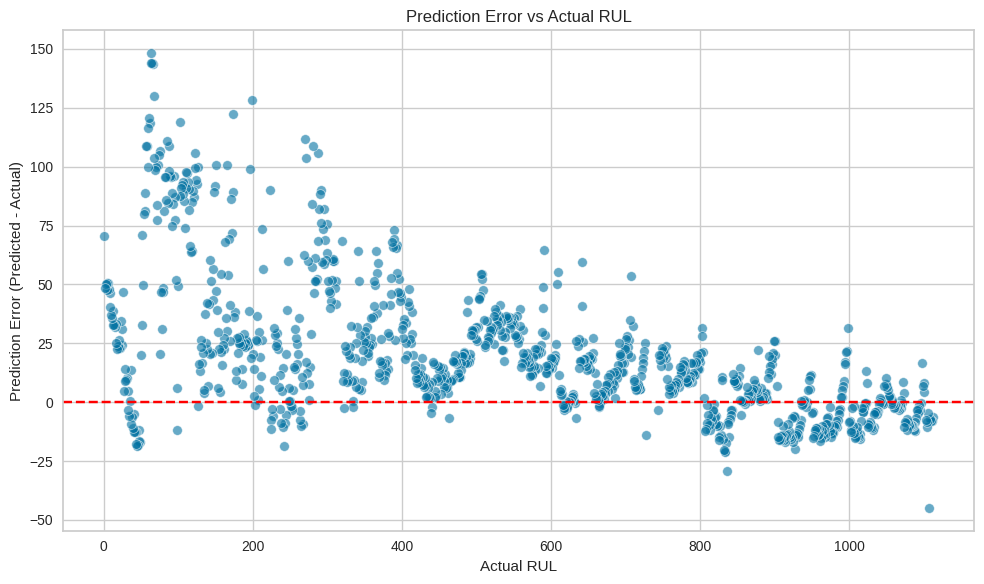

In [67]:
error = y_pred - y_test

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=error, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Prediction Error (Predicted - Actual)')
plt.title('Prediction Error vs Actual RUL')
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
HNEI_df_test['error'] = y_pred - y_test

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='battery_id', y='error', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Prediction Error by Battery ID')
plt.ylabel('Error (Predicted - Actual)')
plt.xlabel('Battery ID')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
HNEI_df_filtered

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery_id,outlier
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1,1
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1,1
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1,1
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1,1
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1,1
...,...,...,...,...,...,...,...,...,...,...
15058,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5,14,1
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4,14,1
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3,14,1
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2,14,1


In [81]:
#let's make the indices for the test sets

test_indices = []

for i in range (1,15):
   test_index = test_indices.append(HNEI_df_filtered[HNEI_df_filtered['battery_id'] == i].tail(200).index)

# Flatten the list of Index objects into a single list of indices
flat_test_indices = [idx for index_list in test_indices for idx in index_list]

# Select the rows using the flattened list of indices
eol_split_test = HNEI_df_filtered.loc[flat_test_indices]
eol_split_train = HNEI_df_filtered.drop(flat_test_indices)


In [82]:
eol_split_test.drop(['battery_id', 'outlier'], axis = 1, inplace = True)
eol_split_train.drop(['battery_id', 'outlier'], axis = 1, inplace = True)

pipeline(eol_split_train, eol_split_test)

,Description,Value
0,Session id,123
1,Target,RUL
2,Target type,Regression
3,Original data shape,"(12113, 8)"
4,Transformed data shape,"(12113, 8)"
5,Transformed train set shape,"(8479, 8)"
6,Transformed test set shape,"(3634, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.0757,205.9620,14.1631,0.9970,0.0345,0.0151,2.5130
rf,Random Forest Regressor,8.5357,295.9007,16.8532,0.9957,0.0408,0.0183,4.6330
xgboost,Extreme Gradient Boosting,11.0460,391.4738,19.2471,0.9943,0.0447,0.0232,0.3670
dt,Decision Tree Regressor,9.6336,567.9002,23.6571,0.9918,0.0588,0.0207,0.0850
lightgbm,Light Gradient Boosting Machine,14.8862,619.8843,24.4320,0.9910,0.0544,0.0308,1.2070
gbr,Gradient Boosting Regressor,23.3888,1056.2349,32.4265,0.9847,0.0804,0.0507,1.5550
knn,K Neighbors Regressor,21.0363,1220.0826,34.8791,0.9824,0.0830,0.0457,0.0370
ada,AdaBoost Regressor,41.3318,2589.2040,50.8405,0.9626,0.1164,0.0850,0.5540
lar,Least Angle Regression,45.8965,6093.3495,76.4452,0.9118,0.1722,0.0963,0.0410
ridge,Ridge Regression,45.7408,6095.5167,76.4228,0.9117,0.1707,0.0960,0.0370


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,142.1119,23014.2510,151.7045,-5.7032,1.4366,5.8499


(ExtraTreesRegressor(n_jobs=-1, random_state=123),
        Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
 873           1137.880005              314.000000                      3.860   
 874           1136.160034              312.190491                      3.861   
 875           1136.189941              314.000000                      3.859   
 876           1119.910034              321.601501                      3.849   
 878           1115.199951              312.171417                      3.840   
 ...                   ...                     ...                        ...   
 15058          773.000000              180.479996                      3.774   
 15059          770.440002              179.523804                      3.773   
 15060          771.119995              179.523804                      3.773   
 15061          769.119995              179.357147                      3.773   
 15062          773.880005              162.374664        

In [87]:
predictions.tail(10)

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),outlier,RUL,prediction_label
1065,938.000000,252.000000,3.813,3.706,1254.875000,1844.380005,7100.500000,1,10,47.23
1066,936.440002,250.991592,3.813,3.705,1252.375000,1844.380005,7113.750000,1,9,49.24
1067,933.880005,249.000000,3.812,3.706,1250.250000,1844.250000,7101.120117,1,8,54.20
1068,930.809998,247.966385,3.811,3.706,1244.375000,1844.380005,7072.189941,1,7,54.94
1069,928.619995,247.500000,3.810,3.707,1236.812988,1844.310059,7048.620117,1,6,56.73
1070,927.119995,248.029419,3.810,3.707,1236.187012,1844.189941,7109.439941,1,5,52.83
1071,928.000000,247.178574,3.810,3.709,1232.250000,1844.250000,7071.310059,1,4,54.51
1072,925.250000,246.000000,3.808,3.707,1232.250000,1844.250000,6985.120117,1,3,53.36
1073,920.250000,243.750000,3.807,3.708,1227.875000,1844.380005,6994.439941,1,2,50.47
1074,906.940002,233.968994,3.795,3.825,854.375000,1582.000000,7776.750000,1,1,71.68


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- outlier


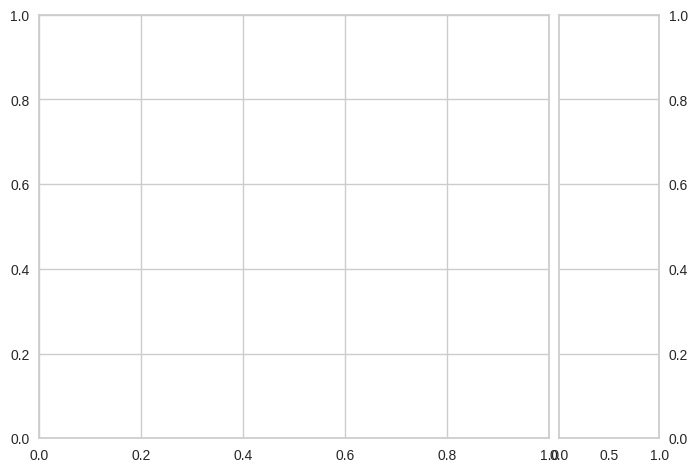

In [83]:
# Visualize residuals
plot_model(best_model, plot='residuals')

# Prediction error (predicted vs actual)
plot_model(best_model, plot='error')

# Feature importance
plot_model(best_model, plot='feature')

# Cumulative residual distribution
plot_model(best_model, plot='cooks')



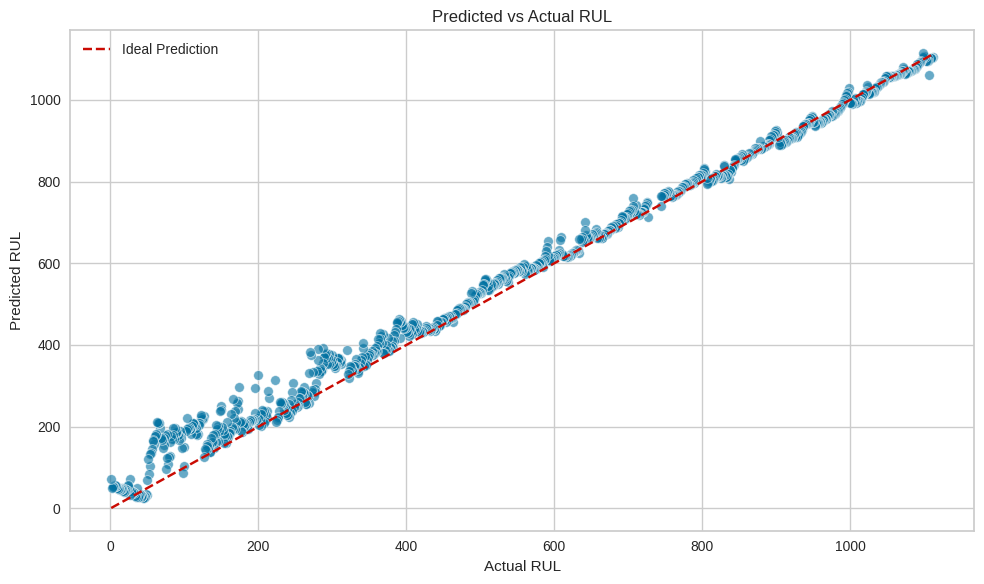

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted RUL values
y_test = predictions['RUL']
y_pred = predictions['prediction_label']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Predicted vs Actual RUL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- outlier


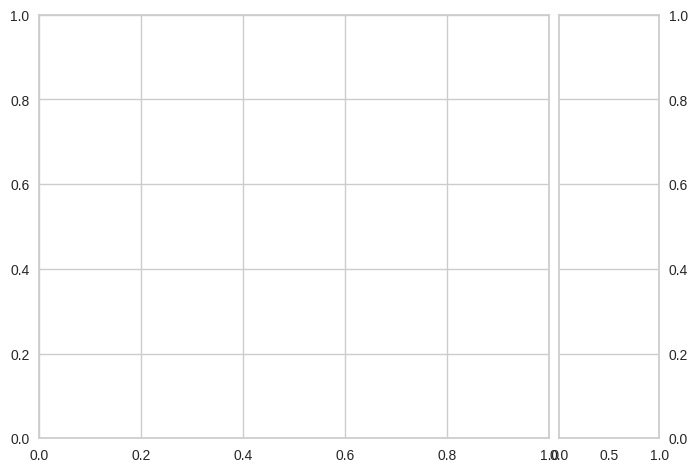

In [85]:
# Visualize residuals
plot_model(best_model, plot='residuals')

# Prediction error (predicted vs actual)
plot_model(best_model, plot='error')

# Feature importance
plot_model(best_model, plot='feature')

# Cumulative residual distribution
plot_model(best_model, plot='cooks')

